In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from funcioneschicuadrado_continuas import*


from funciones_KS_test import*

from funciones_qq_pp_plotNuevas import*

In [13]:
datos_llegada_aviones=pd.read_excel('Datos-Caso-III.xlsx',sheet_name='DatosLlegadaAviones')
datos_llegada_aviones['Fecha de Llegada'] = pd.to_datetime(datos_llegada_aviones['Fecha de Llegada'])
datos_llegada_aviones.head()

,Fecha de Llegada,Tipo de Avión
0,2023-05-01 00:00:00.000,Mediano
1,2023-05-01 00:12:48.533,Grande
2,2023-05-01 00:20:31.919,Mediano
3,2023-05-01 00:31:48.641,Pequeño
4,2023-05-01 00:40:09.796,Pequeño


In [14]:
datos_pasajeros=pd.read_excel('Datos-Caso-III.xlsx',sheet_name='DatosPasajeros')
datos_pasajeros.head()

,Pasajero,Tipo de pasaporte,¿Lleva maleta?
0,1,Extranjero,Sí
1,2,Nacional no biométrico,No
2,3,Nacional no biométrico,Sí
3,4,Nacional no biométrico,Sí
4,5,Nacional no biométrico,Sí


In [15]:
datos_tiempo_servicio=pd.read_excel('Datos-Caso-III.xlsx',sheet_name='TiempoDeServicioBiométrico')
datos_tiempo_servicio.head()

,Persona atendida,Tipo de pasaporte,Tiempo de servicio (minutos)
0,1,Biométrico,0.349995
1,2,Biométrico,2.046627
2,3,Biométrico,0.232612
3,4,Biométrico,1.085411
4,5,Biométrico,2.585409


#### a.  Tiempo entre arribos de un avión desde un destino internacional para cada una de las siguientes franjas cuatro horarias: (6:00 am – 11:00 am; 11:00 am – 3:00 pm; 3:00 pm – 9:00 pm; 9:00 pm – 6:00 am) 

In [16]:
def asignar_franja(row):
    hora = row.hour
    if 6 <= hora < 11:
        return '6:00 am - 11:00 am'
    elif 11 <= hora < 15:
        return '11:00 am - 3:00 pm'
    elif 15 <= hora < 21:
        return '3:00 pm - 9:00 pm'
    else:
        return '9:00 pm - 6:00 am'

# Aplicar la función a la columna 'Fecha de Llegada'
datos_llegada_aviones['Franja Horaria'] = datos_llegada_aviones['Fecha de Llegada'].apply(asignar_franja)
datos_llegada_aviones.head()

,Fecha de Llegada,Tipo de Avión,Franja Horaria
0,2023-05-01 00:00:00.000,Mediano,9:00 pm - 6:00 am
1,2023-05-01 00:12:48.533,Grande,9:00 pm - 6:00 am
2,2023-05-01 00:20:31.919,Mediano,9:00 pm - 6:00 am
3,2023-05-01 00:31:48.641,Pequeño,9:00 pm - 6:00 am
4,2023-05-01 00:40:09.796,Pequeño,9:00 pm - 6:00 am


Inicialmente asignamos una franja horaria para para los datos de llegada, para despues proceder a hacer un analisis de tiempo entre llegadas para cada franja horaria

In [17]:
datos_llegada_aviones = datos_llegada_aviones.sort_values('Fecha de Llegada')

datos_llegada_aviones['Fecha'] = datos_llegada_aviones['Fecha de Llegada'].dt.date

# Calcular el tiempo entre arribos
datos_llegada_aviones['Tiempo entre Arribos'] = datos_llegada_aviones['Fecha de Llegada']

# Filtrar datos para obtener tiempos entre arribos en cada franja horaria
datos_llegada_aviones['Tiempo entre Arribos (minutos)'] = datos_llegada_aviones['Fecha de Llegada'].diff().dt.total_seconds() / 60


datos_llegada_aviones.head()


,Fecha de Llegada,Tipo de Avión,Franja Horaria,Fecha,Tiempo entre Arribos,Tiempo entre Arribos (minutos)
0,2023-05-01 00:00:00.000,Mediano,9:00 pm - 6:00 am,2023-05-01,2023-05-01 00:00:00.000,NaN
1,2023-05-01 00:12:48.533,Grande,9:00 pm - 6:00 am,2023-05-01,2023-05-01 00:12:48.533,12.808883
2,2023-05-01 00:20:31.919,Mediano,9:00 pm - 6:00 am,2023-05-01,2023-05-01 00:20:31.919,7.723100
3,2023-05-01 00:31:48.641,Pequeño,9:00 pm - 6:00 am,2023-05-01,2023-05-01 00:31:48.641,11.278700
4,2023-05-01 00:40:09.796,Pequeño,9:00 pm - 6:00 am,2023-05-01,2023-05-01 00:40:09.796,8.352583


In [19]:
tiempos_entre_arribos = []
fechas_unicas = datos_llegada_aviones['Fecha'].unique()
franjas = ['6:00 am - 11:00 am', '11:00 am - 3:00 pm', '3:00 pm - 9:00 pm', '9:00 pm - 6:00 am']

# Iterar por cada fecha
for fecha in fechas_unicas:
    # Filtrar por la fecha actual
    datos_dia = datos_llegada_aviones[datos_llegada_aviones['Fecha'] == fecha]
    
    # Iterar por cada franja horaria
    for franja in franjas:
        # Filtrar por la franja horaria actual
        datos_franja = datos_dia[datos_dia['Franja Horaria'] == franja]
        
        # Ordenar los datos por la hora de llegada
        datos_franja = datos_franja.sort_values('Fecha de Llegada')
        
        # Calcular el tiempo entre arribos
        tiempos_franja = datos_franja['Fecha de Llegada'].diff().dt.total_seconds() / 60
        
        # Guardar los resultados en el array
        for tiempo in tiempos_franja.dropna():
            tiempos_entre_arribos.append({
                'Fecha': fecha,
                'Franja Horaria': franja,
                'Tiempo entre Arribos (minutos)': tiempo
            })

# Convertir el array a un DataFrame para mejor visualización
tiempos_entre_arribos_df = pd.DataFrame(tiempos_entre_arribos)

# Mostrar los primeros resultados
tiempos_entre_arribos_df.head(10)

,Fecha,Franja Horaria,Tiempo entre Arribos (minutos)
0,2023-05-01,6:00 am - 11:00 am,6.813133
1,2023-05-01,6:00 am - 11:00 am,5.022633
2,2023-05-01,6:00 am - 11:00 am,14.201983
3,2023-05-01,6:00 am - 11:00 am,8.646233
4,2023-05-01,6:00 am - 11:00 am,3.583833
5,2023-05-01,6:00 am - 11:00 am,1.062367
6,2023-05-01,6:00 am - 11:00 am,1.904667
7,2023-05-01,6:00 am - 11:00 am,24.959717
8,2023-05-01,6:00 am - 11:00 am,2.041217
9,2023-05-01,6:00 am - 11:00 am,18.769750


In [41]:
promedio_tiempo_entre_arribos = tiempos_entre_arribos_df.groupby('Franja Horaria')['Tiempo entre Arribos (minutos)'].mean().reset_index()
print('Tiempo entre arribos promedio por franja horaria:\n')
print(promedio_tiempo_entre_arribos)

Tiempo entre arribos promedio por franja horaria:

       Franja Horaria  Tiempo entre Arribos (minutos)
0  11:00 am - 3:00 pm                        3.691804
1   3:00 pm - 9:00 pm                        7.016715
2  6:00 am - 11:00 am                        5.948389
3   9:00 pm - 6:00 am                       28.985523


In [46]:
datos_llegada_aviones['Franja Horaria'].value_counts()

Franja Horaria
11:00 am - 3:00 pm    1289
6:00 am - 11:00 am    1046
3:00 pm - 9:00 pm     1021
9:00 pm - 6:00 am     1018
Name: count, dtype: int64

In [47]:
tiempos_entre_arribos_df['Franja Horaria'].value_counts()

Franja Horaria
11:00 am - 3:00 pm    1268
6:00 am - 11:00 am    1025
3:00 pm - 9:00 pm     1001
9:00 pm - 6:00 am      997
Name: count, dtype: int64

Vemos entonces que la llegada de aviones esta distribuida de manera equitativa en todas las franjas excepto de 11 AM a 3 PM donde se tienen 200 llegadas mas, con un tiempo entre arribos menor. 


| Franja Horaria      | Tiempo entre Arribos (minutos) |
|--------------------|--------------------------------|
| 11:00 am - 3:00 pm | 3.691804                       |
| 3:00 pm - 9:00 pm  | 7.016715                       |
| 6:00 am - 11:00 am | 5.948389                       |
| 9:00 pm - 6:00 am  | 28.985523                    |


| Franja Horaria      | Conteo de llegada |
|--------------------|-------------------|
| 11:00 am - 3:00 pm | 1289              |
| 6:00 am - 11:00 am | 1046              |
| 3:00 pm - 9:00 pm  | 1021              |
| 9:00 pm - 6:00 am  | 1018              |

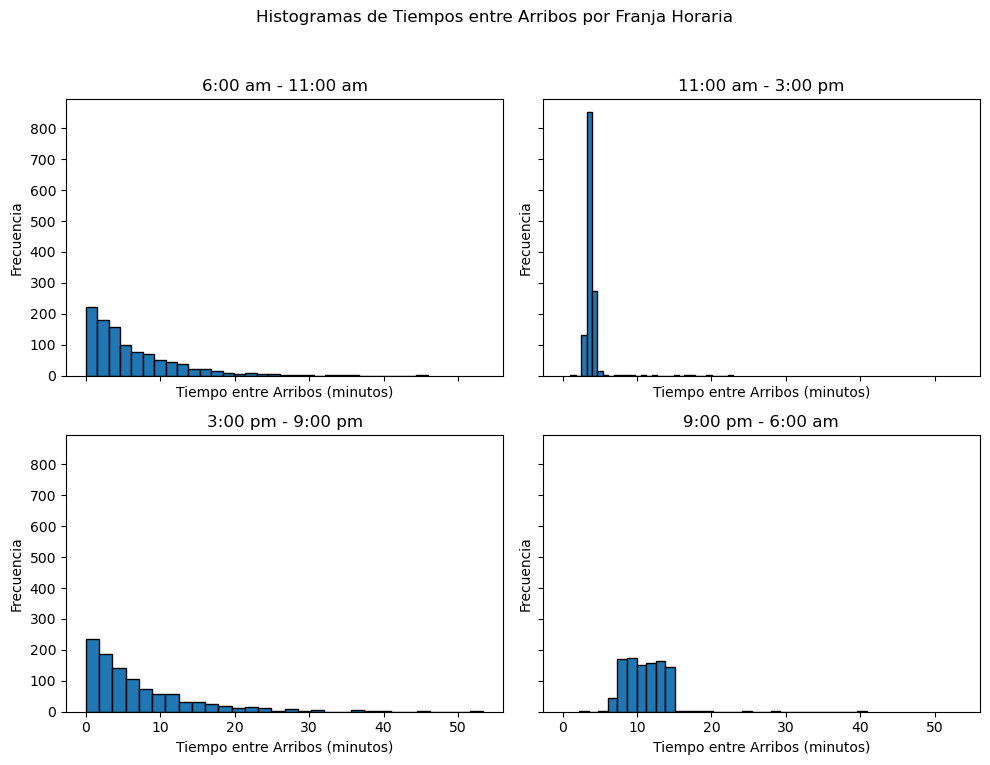

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle('Histogramas de Tiempos entre Arribos por Franja Horaria')

# Crear histogramas para cada franja horaria
for ax, franja in zip(axs.flatten(), franjas):
    datos_franja = datos_llegada_aviones[datos_llegada_aviones['Franja Horaria'] == franja]['Tiempo entre Arribos (minutos)'].dropna()
    ax.hist(datos_franja, bins=30, edgecolor='black')
    ax.set_title(franja)
    ax.set_xlabel('Tiempo entre Arribos (minutos)')
    ax.set_ylabel('Frecuencia')


# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los histogramas
plt.show()

##### A continuacion se grafican PP y QQ plots para el tiempo entre arribos

Despues de revisar las distribuciones, fue posible ver que estos datos para las franjas horarias parecen tener ciertas distribuciones:

| Franja Horaria      | Distribucion  |
|--------------------|-------------------|
| 6:00 am - 11:00 am| Exponencial y Weibull             |
| 11:00 am - 3:00 pm | Lognormal          |
| 3:00 pm - 9:00 pm  | Exponencial y  Weibull             |
| 9:00 pm - 6:00 am  | Ninguna           |


Abajo se ven las 3 graficas por franja horaria, pero se pasara a hacer unas pruebas de bondad de ajuste para comprobar todo de manera correcta


In [ ]:
tiempos_entre_arribos = tiempos_entre_arribos_df['Tiempo entre Arribos (minutos)']

Análisis para la franja horaria EXPONENCIAL: 6:00 am - 11:00 am
Parámetro estimado: Tasa = 0.16811273275751143


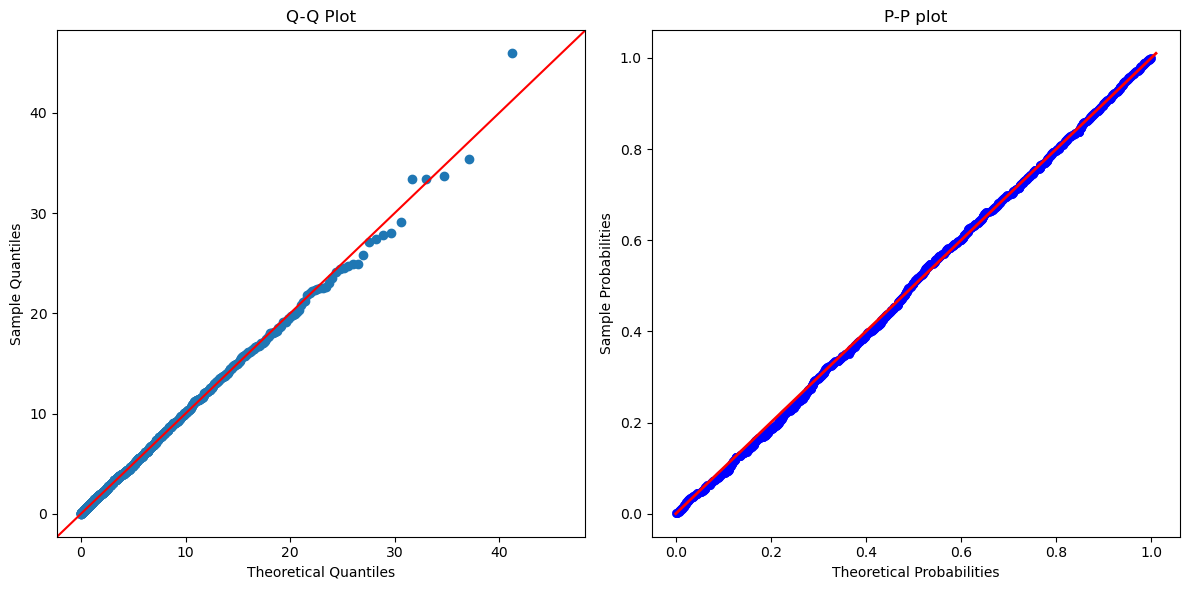

Análisis para la franja horaria EXPONENCIAL: 11:00 am - 3:00 pm
Parámetro estimado: Tasa = 0.2708702800413111


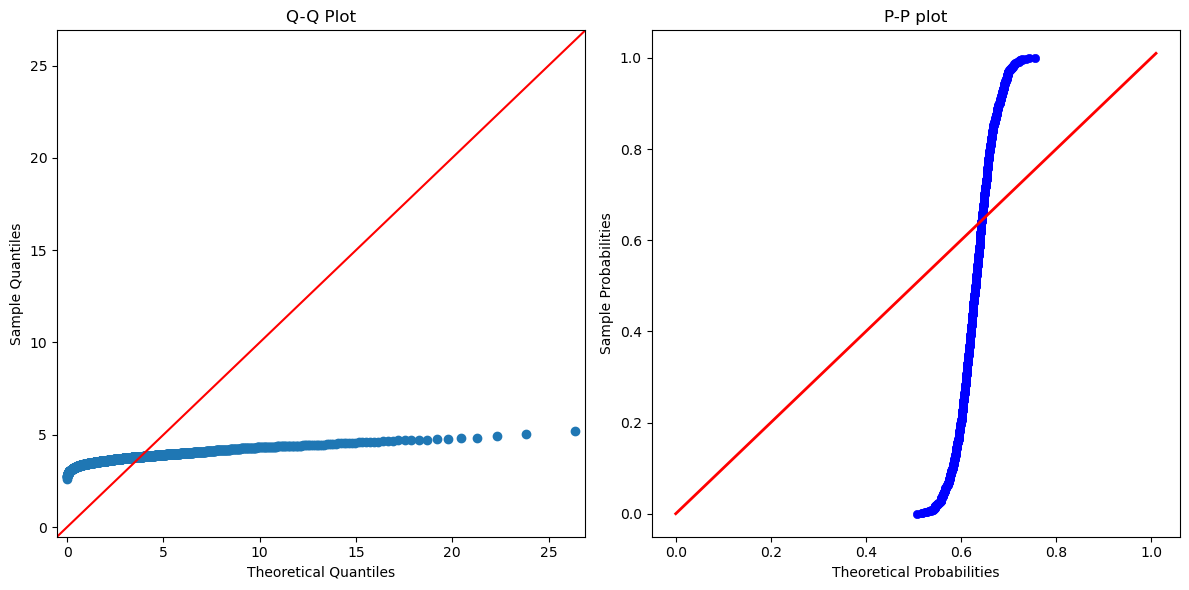

Análisis para la franja horaria EXPONENCIAL: 3:00 pm - 9:00 pm
Parámetro estimado: Tasa = 0.14251684008738735


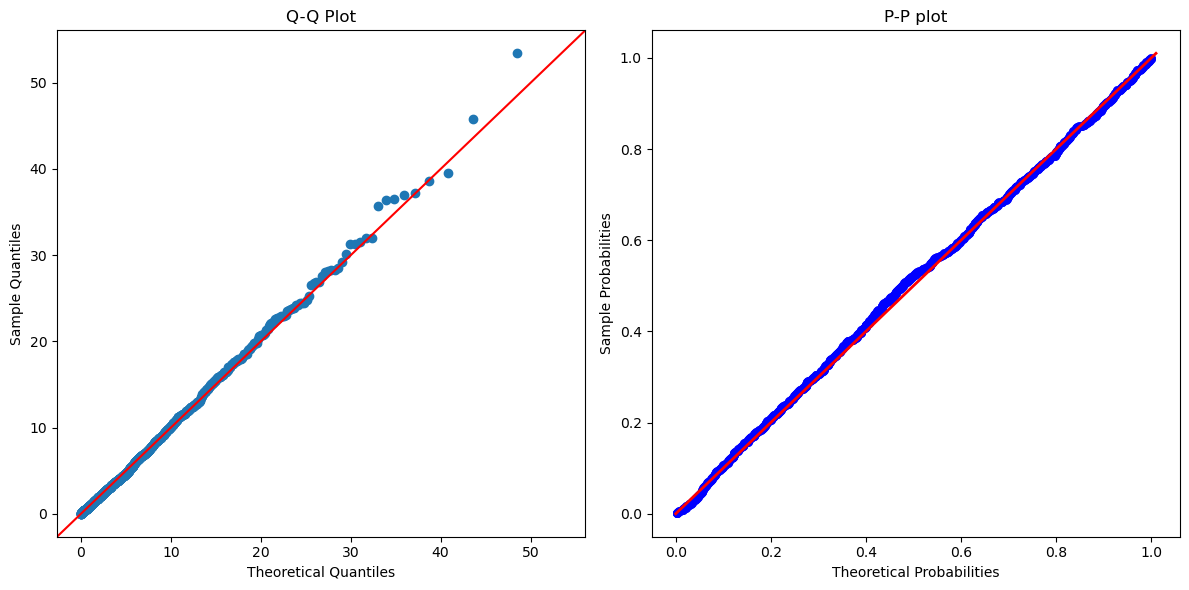

Análisis para la franja horaria EXPONENCIAL: 9:00 pm - 6:00 am
Parámetro estimado: Tasa = 0.0344999811071944


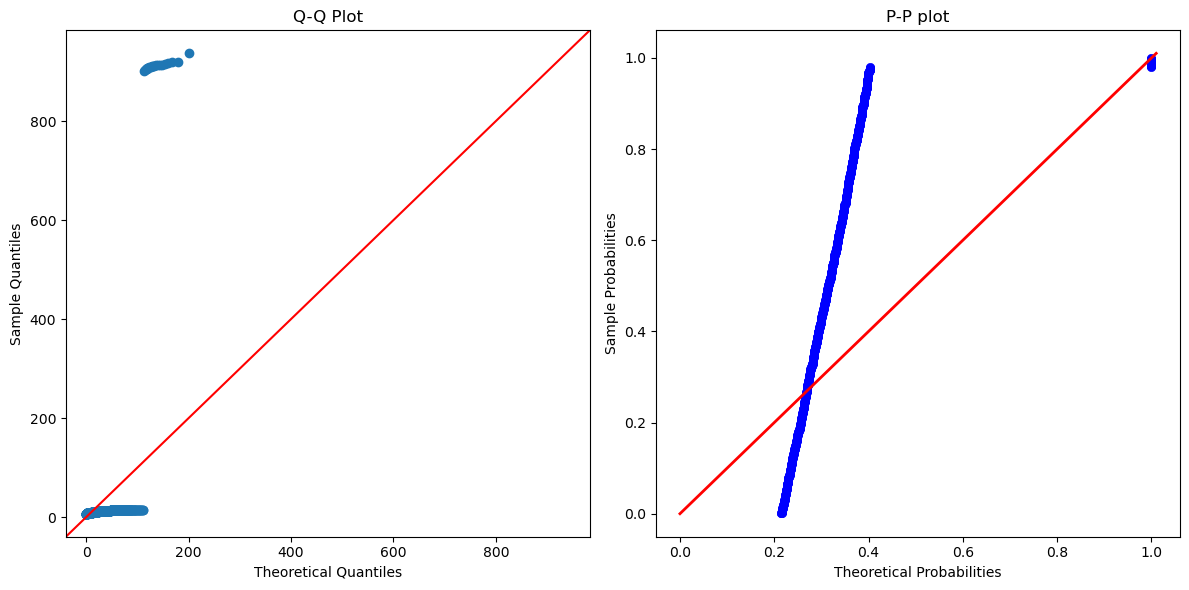

In [53]:

for franja in franjas:
    print(f"Análisis para la franja horaria EXPONENCIAL: {franja}")
    datos_franja = tiempos_entre_arribos_df[tiempos_entre_arribos_df['Franja Horaria'] == franja]
    tiempos_entre_arribos = datos_franja['Tiempo entre Arribos (minutos)']
    PP_QQ_plot_exponential(tiempos_entre_arribos)

Análisis para la franja horaria WEIBULL: 6:00 am - 11:00 am
Parámetro estimado: Forma = 1.0238005605107
Parámetro estimado: Escala = 6.0060899730649355


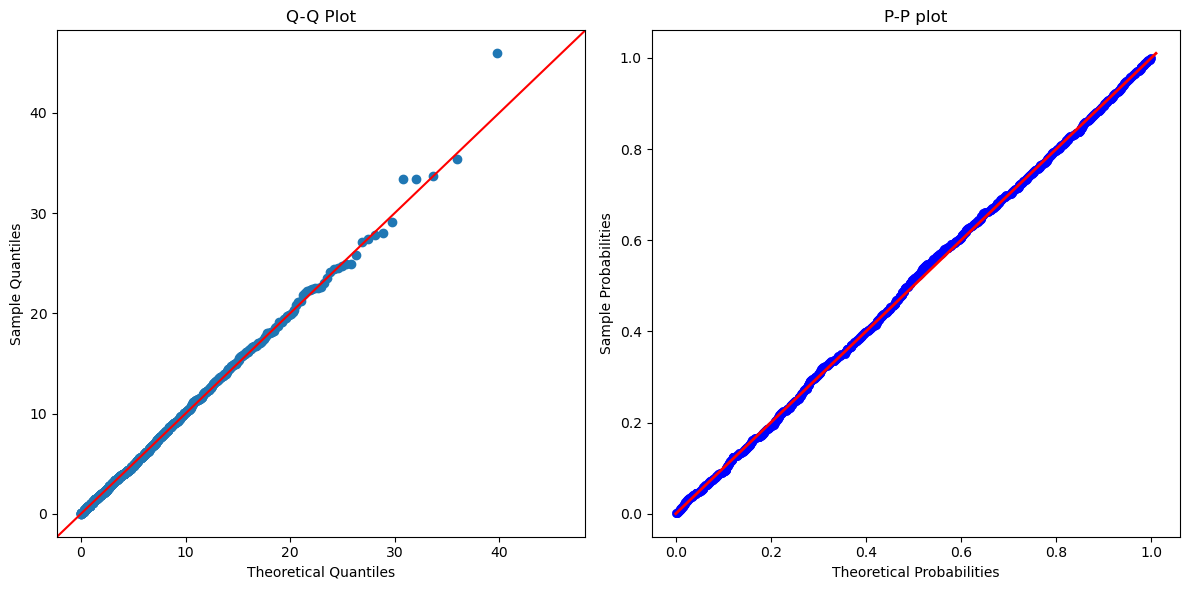

Análisis para la franja horaria WEIBULL: 11:00 am - 3:00 pm
Parámetro estimado: Forma = 11.741171270052494
Parámetro estimado: Escala = 3.8556705510380787


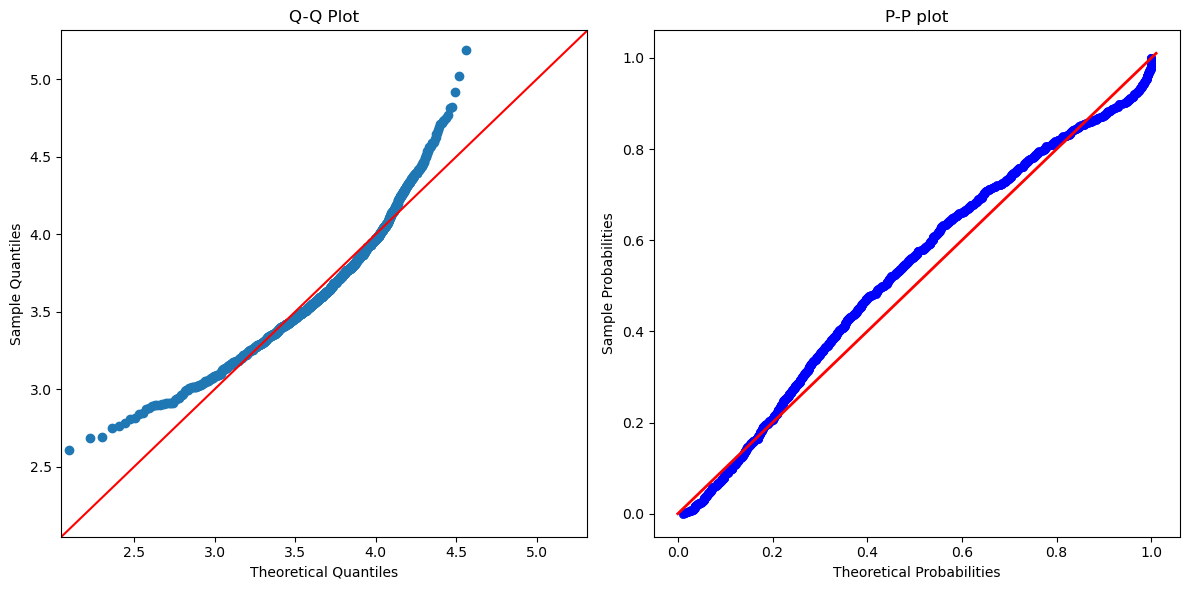

Análisis para la franja horaria WEIBULL: 3:00 pm - 9:00 pm
Parámetro estimado: Forma = 0.9827420948633471
Parámetro estimado: Escala = 6.964121891391093


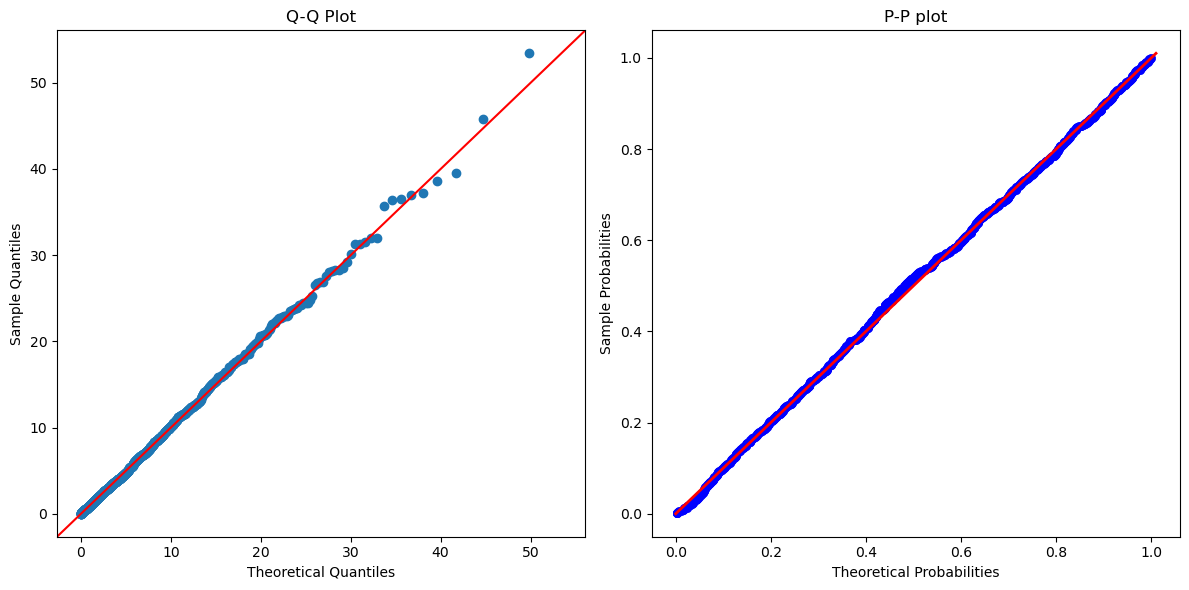

Análisis para la franja horaria WEIBULL: 9:00 pm - 6:00 am
Parámetro estimado: Forma = 0.20209136976800673
Parámetro estimado: Escala = 0.2637750054956092


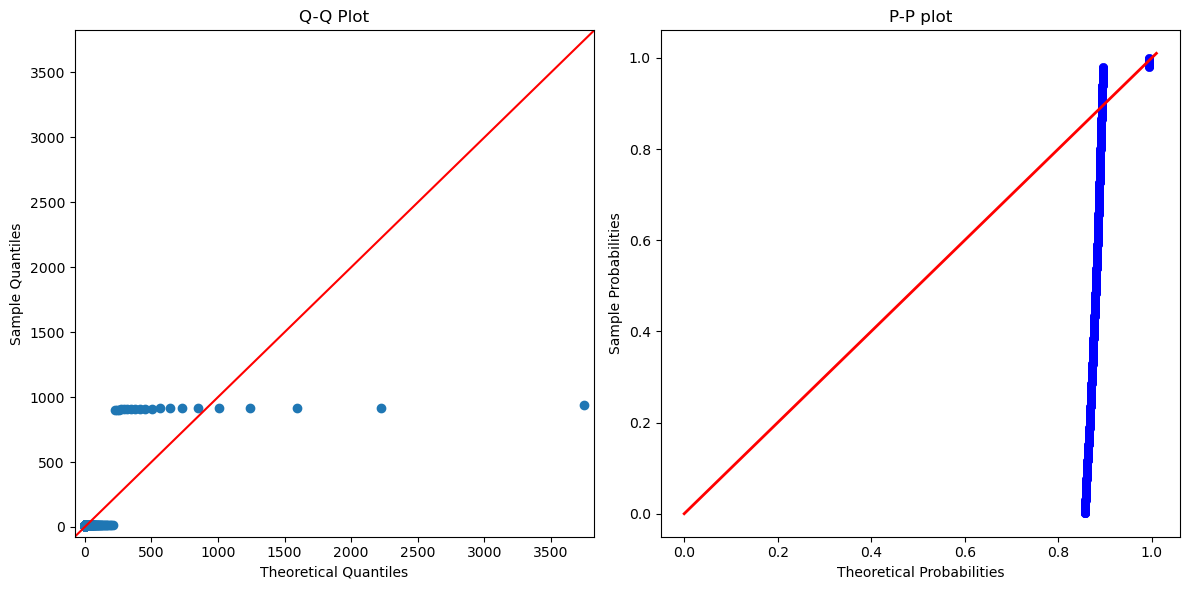

In [54]:
for franja in franjas:
    print(f"Análisis para la franja horaria WEIBULL: {franja}")
    datos_franja = tiempos_entre_arribos_df[tiempos_entre_arribos_df['Franja Horaria'] == franja]
    tiempos_entre_arribos = datos_franja['Tiempo entre Arribos (minutos)']
    PP_QQ_plot_weibull(tiempos_entre_arribos)

Análisis para la franja horaria LOGNORMAL: 6:00 am - 11:00 am
Parámetro estimado (normal asociada): Media = 1.2281822014925585
Parámetro estimado (normal asociada): Desviación Estándar = 1.2498301729549852


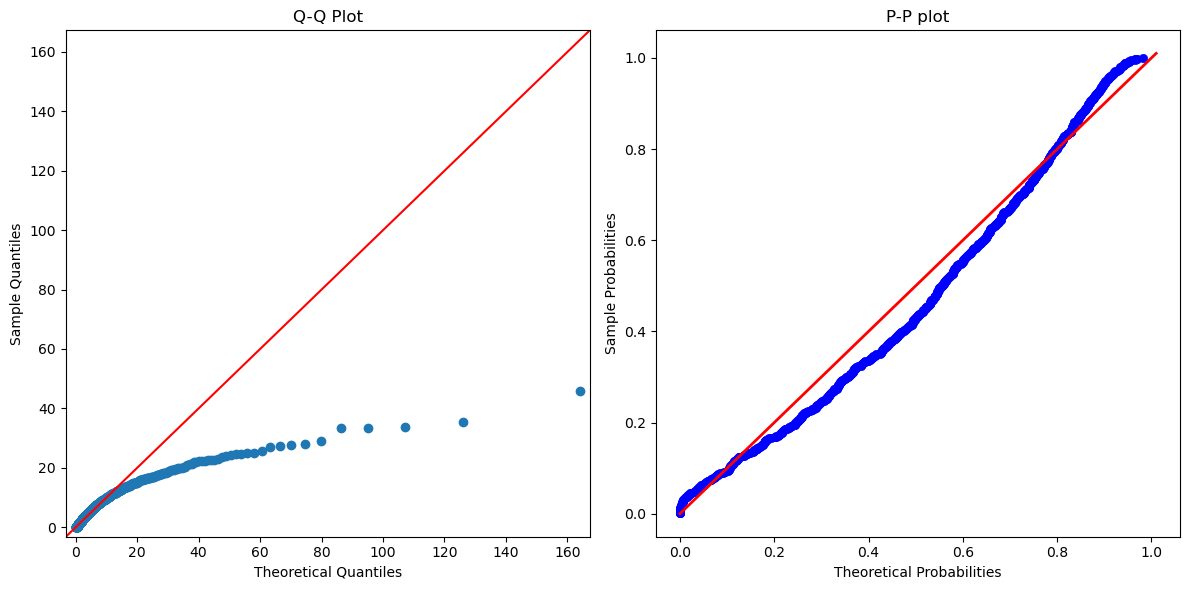

Análisis para la franja horaria LOGNORMAL: 11:00 am - 3:00 pm
Parámetro estimado (normal asociada): Media = 1.3007791717229005
Parámetro estimado (normal asociada): Desviación Estándar = 0.10334412225694578


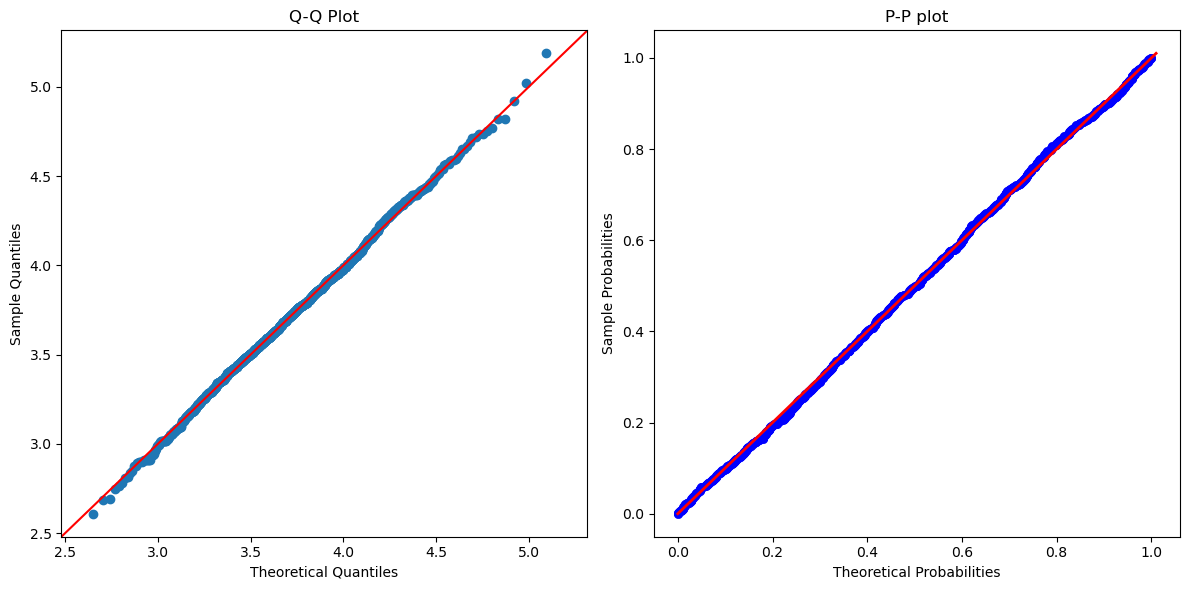

Análisis para la franja horaria LOGNORMAL: 3:00 pm - 9:00 pm
Parámetro estimado (normal asociada): Media = 1.3681853821510235
Parámetro estimado (normal asociada): Desviación Estándar = 1.2478932484049388


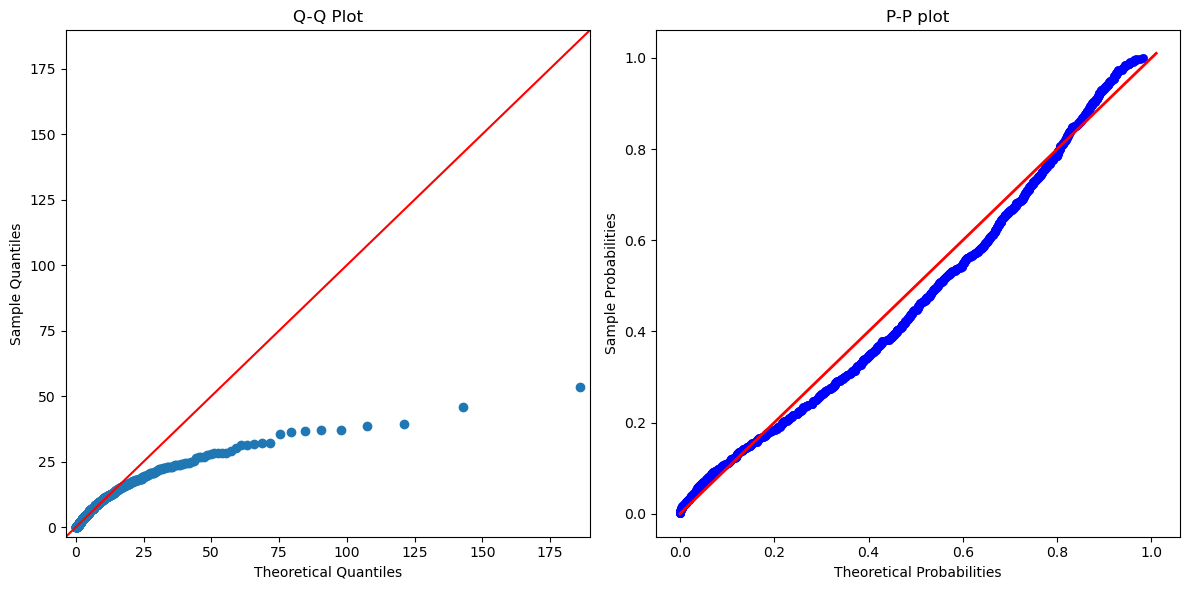

Análisis para la franja horaria LOGNORMAL: 9:00 pm - 6:00 am
Parámetro estimado (normal asociada): Media = 2.455595882709544
Parámetro estimado (normal asociada): Desviación Estándar = 0.6599938866964944


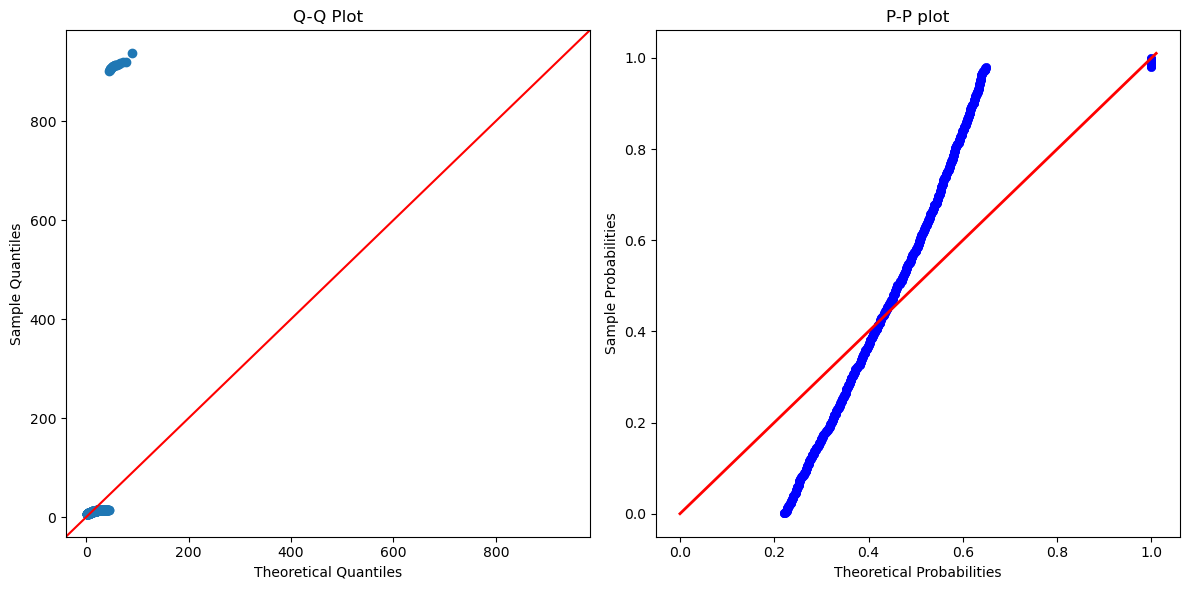

In [55]:
for franja in franjas:
    print(f"Análisis para la franja horaria LOGNORMAL: {franja}")
    datos_franja = tiempos_entre_arribos_df[tiempos_entre_arribos_df['Franja Horaria'] == franja]
    tiempos_entre_arribos = datos_franja['Tiempo entre Arribos (minutos)'].dropna()
    PP_QQ_plot_lognormal(tiempos_entre_arribos)

Análisis para la franja horaria NORMAL: 6:00 am - 11:00 am
Parámetro estimado: Media = 5.948389414634146
Parámetro estimado: Varianza = 33.88332028828226


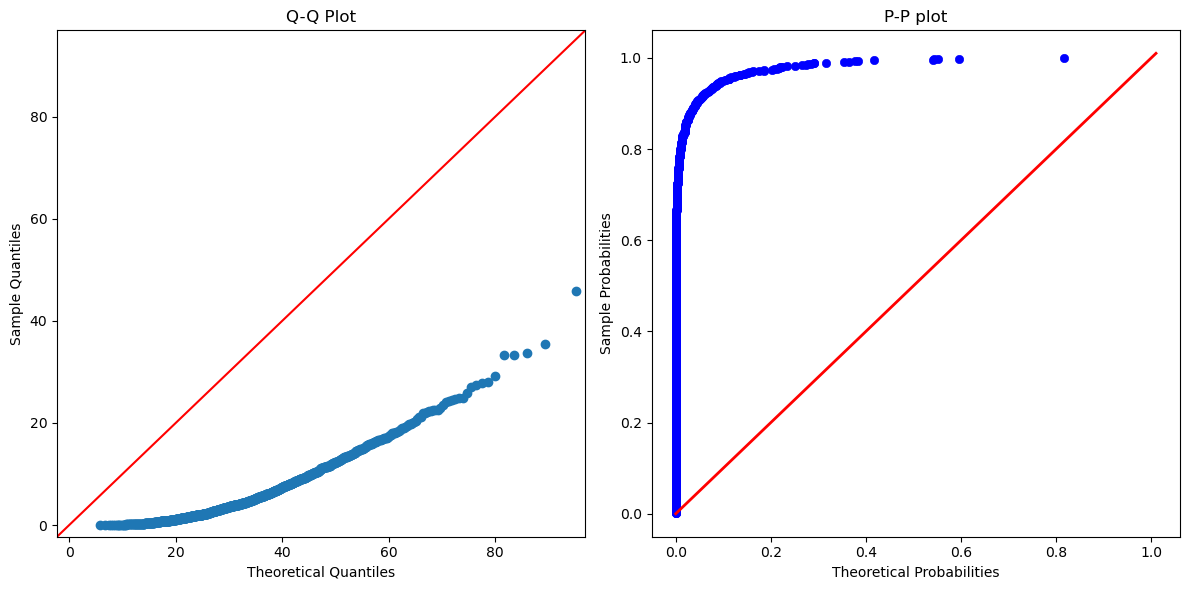

Análisis para la franja horaria NORMAL: 11:00 am - 3:00 pm
Parámetro estimado: Media = 3.6918040615141963
Parámetro estimado: Varianza = 0.14604095542054407


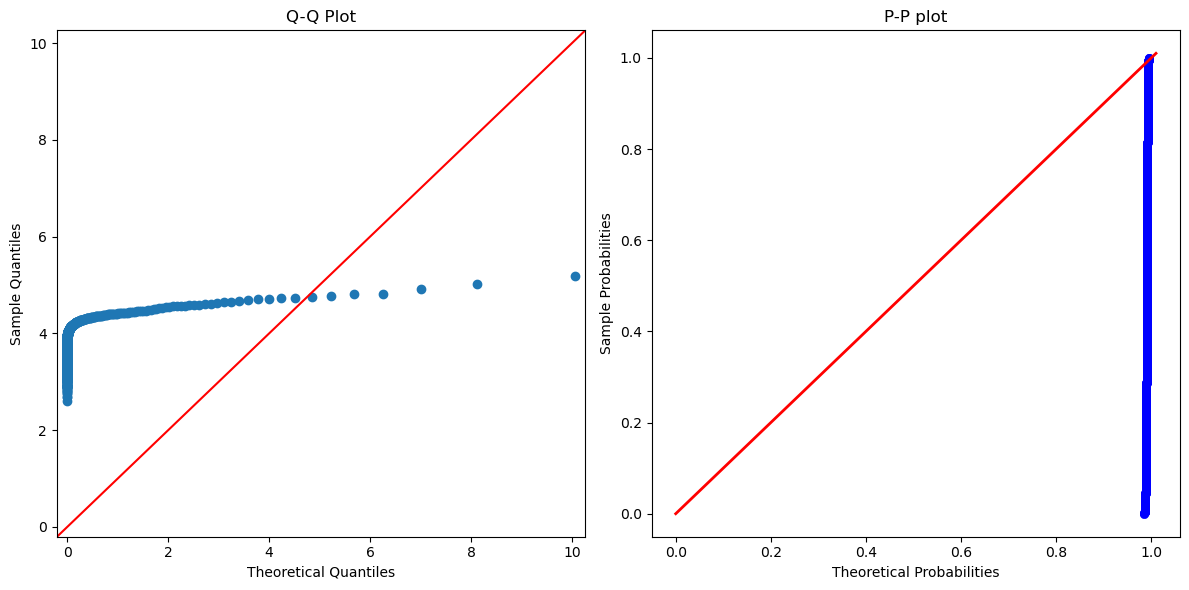

Análisis para la franja horaria NORMAL: 3:00 pm - 9:00 pm
Parámetro estimado: Media = 7.016714652014652
Parámetro estimado: Varianza = 50.83830881963658


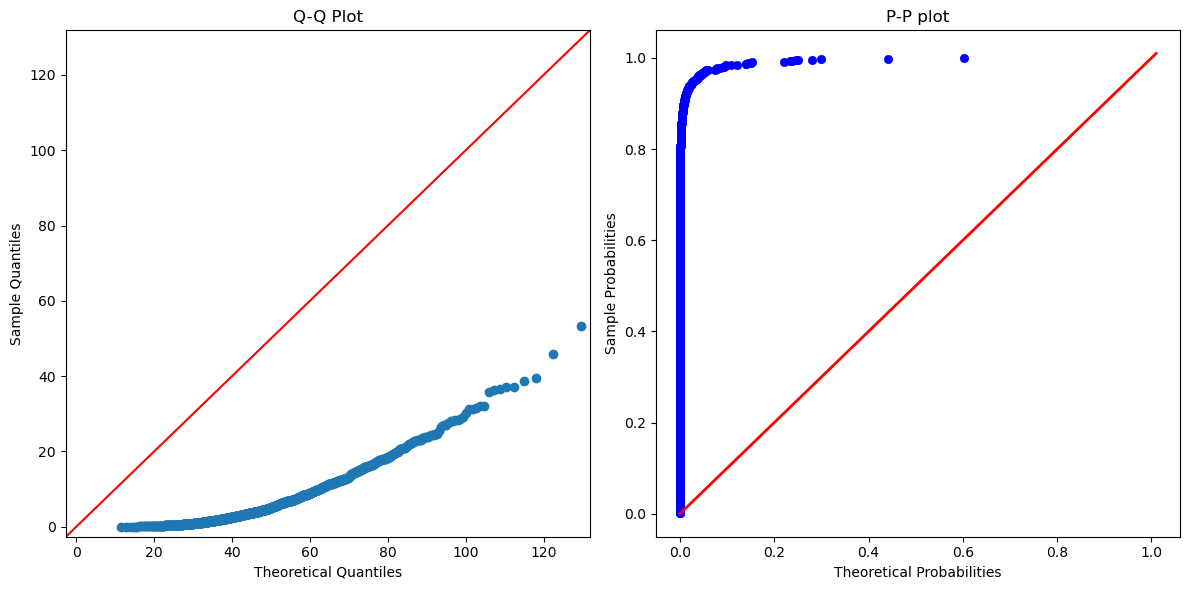

Análisis para la franja horaria NORMAL: 9:00 pm - 6:00 am
Parámetro estimado: Media = 28.985523119358074
Parámetro estimado: Varianza = 15969.077945038993


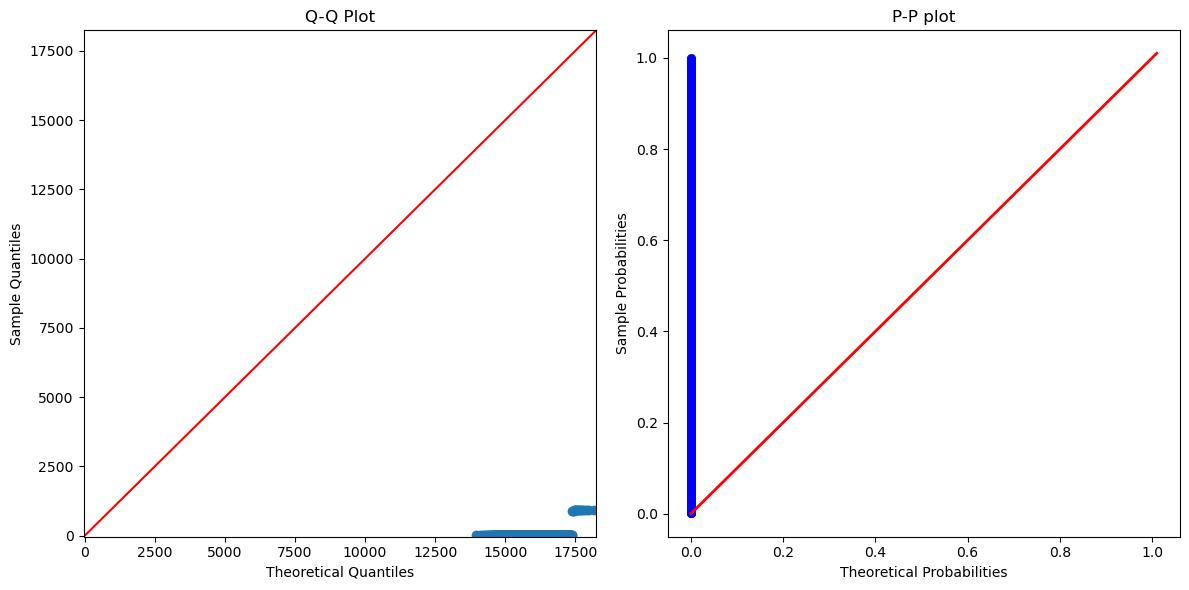

In [57]:
for franja in franjas:
    print(f"Análisis para la franja horaria NORMAL: {franja}")
    datos_franja = tiempos_entre_arribos_df[tiempos_entre_arribos_df['Franja Horaria'] == franja]
    tiempos_entre_arribos = datos_franja['Tiempo entre Arribos (minutos)'].dropna()
    PP_QQ_plot_gamma(tiempos_entre_arribos)

In [31]:
def aplicar_pruebas_bondad_ajuste(data):
    print("\nEvaluando bondad de ajuste para distribución Normal:")
    chi_square_normal_goodness_of_fit(data)

    print("\nEvaluando bondad de ajuste para distribución Exponencial:")
    chi_square_exponential_goodness_of_fit(data)

    print("\nEvaluando bondad de ajuste para distribución Lognormal:")
    chi_square_lognormal_goodness_of_fit(data)

    print("\nEvaluando bondad de ajuste para distribución Uniforme:")
    chi_square_uniform_goodness_of_fit(data)

    print("\nEvaluando bondad de ajuste para distribución Triangular:")
    chi_square_triangular_goodness_of_fit(data)

    print("\nEvaluando bondad de ajuste para distribución Gamma:")
    chi_square_gamma_goodness_of_fit(data)

    print("\nEvaluando bondad de ajuste para distribución Weibull:")
    chi_square_weibull_goodness_of_fit(data)

In [32]:
for franja in franjas:
    print(f"\n--- Análisis para la franja horaria: {franja} ---")
    datos_franja = tiempos_entre_arribos_df[tiempos_entre_arribos_df['Franja Horaria'] == franja]
    tiempos_entre_arribos = datos_franja['Tiempo entre Arribos (minutos)'].dropna()
    aplicar_pruebas_bondad_ajuste(tiempos_entre_arribos)



--- Análisis para la franja horaria: 6:00 am - 11:00 am ---

Evaluando bondad de ajuste para distribución Normal:
Parámetro estimado: Media = 5.948389414634146
Parámetro estimado: Desviación Estándar = 5.820938093493373
Chi-squared statistic: 857.2000000000027
p-value: 0.0

Evaluando bondad de ajuste para distribución Exponencial:
Parámetro estimado: Tasa = 0.16811273275751143
Chi-squared statistic: 169.59999999999903
p-value: 0.9577199926644187

Evaluando bondad de ajuste para distribución Lognormal:
Parámetro estimado (lognormal asociada): Media = 1.2281822014925585
Parámetro estimado (lognormal asociada): Desviación Estándar = 1.2498301729549852
Chi-squared statistic: 363.6000000000012
p-value: 2.3733348619714434e-11

Evaluando bondad de ajuste para distribución Uniforme:
Parámetro estimado: a = 0.0035499999999999998
Parámetro estimado: b = 45.93255
Chi-squared statistic: 3077.2
p-value: 0.0

Evaluando bondad de ajuste para distribución Triangular:
Parámetro estimado: a = 0.0035499

c:\Users\WD\.ipython\Workspace Visual Code\Maestria\Mastertrack 3\Simulacion-Python\Semana 3\Caso\funcioneschicuadrado_continuas.py:350: RuntimeWarning: invalid value encountered in scalar divide
  chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k-1))


Chi-squared statistic: 8412.418741661579
p-value: 0.0

Evaluando bondad de ajuste para distribución Lognormal:
Parámetro estimado (lognormal asociada): Media = 1.3007791717229005
Parámetro estimado (lognormal asociada): Desviación Estándar = 0.10334412225694578
Chi-squared statistic: 241.61987381702875
p-value: 0.6365071177875818

Evaluando bondad de ajuste para distribución Uniforme:
Parámetro estimado: a = 2.60935
Parámetro estimado: b = 5.1869499999999995
Chi-squared statistic: 1450.3343568035293
p-value: 0.0

Evaluando bondad de ajuste para distribución Triangular:
Parámetro estimado: a = 2.60935
Parámetro estimado: b = 5.1869499999999995
Parámetro estimado: c = 3.5780499999999997
Chi-squared statistic: 477.9848343519192
p-value: 1.1102230246251565e-16

Evaluando bondad de ajuste para distribución Gamma:
Parámetro estimado: Media = 3.6918040615141963
Parámetro estimado: Varianza = 0.14604095542054407
Chi-squared statistic: nan
p-value: nan

Evaluando bondad de ajuste para distribuc

c:\Users\WD\.ipython\Workspace Visual Code\Maestria\Mastertrack 3\Simulacion-Python\Semana 3\Caso\funcioneschicuadrado_continuas.py:350: RuntimeWarning: divide by zero encountered in scalar divide
  chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k-1))


##### A continuacion se grafican PP y QQ plots para el tiempo entre arribos

Despues de revisar las distribuciones, fue posible ver con una prueba chi cuadrado las distribuciones con un P-value mayor a una significancia del 5%:

| Franja Horaria      | Distribucion  |
|--------------------|-------------------|
| 6:00 am - 11:00 am| Tanto Exponencial como Weibull   (Mas Exponencial)          |
| 11:00 am - 3:00 pm | Normal y Lognormal  (Mas LogNormal)     |
| 3:00 pm - 9:00 pm  | Exponencial y  Weibull    (Mas Exponenciall)       |
| 9:00 pm - 6:00 am  | La que mas se parece es Lognormal pero no es seguro              |

Esto no reemplaza unas pruebas de bondad de ajuste para comprobar todo de manera correcta


#### b. Tiempo de atención del módulo biométrico inteligente. (30 puntos)

### Discretas

#### c. Probabilidad de que el avión que acaba de aterrizar sea grande, mediano o pequeño. (10 puntos)

#### d. Probabilidad asociada al tipo de pasajero/pasaporte. (10 puntos)

#### e. Probabilidad de que el pasajero haya viajado con maleta. (10 puntos)